## Boston House Prices Project

We are trying to build a model that can provide a price estimate based on a home's characteristics like:
* The number of rooms
* The distance to employment centres
* How rich or poor the area is
* How many students there are per teacher in local schools etc.

### Understand the Boston House Price Dataset

---------------------------

**Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. PRICE     Median value of owner-occupied homes in $1000's
        
    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. You can find the [original research paper here](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y). 


In [113]:
# Import all the tools we need
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [114]:
df = pd.read_csv("boston-house-prices.csv", index_col=0)
df.head() # This is how our data lookslike

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [115]:
df.shape # (rows,columns)

(506, 14)

In [116]:
# information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


In [117]:
df.isna().sum() # there is no missing values..

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [118]:
# Descriptive statistics of numerical data
df.describe() # mean of house prices: $ 22.53k 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


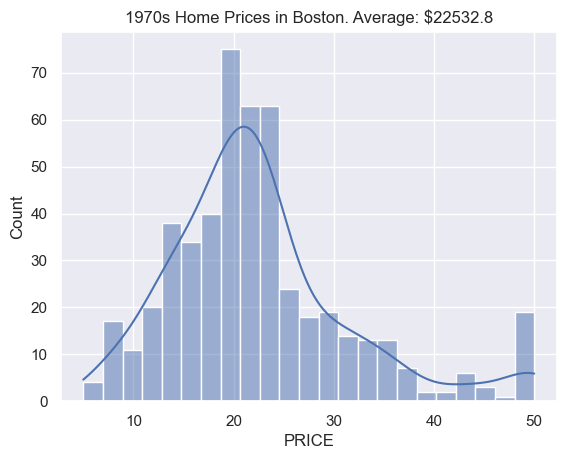

In [119]:
# Firstly looking at our target column
sns.set_theme()
sns.histplot(df.PRICE, kde=True);
plt.title(f'1970s Home Prices in Boston. Average: ${(1000*df.PRICE.mean()):.6}');

>Looks like normal distribution except 50k jump

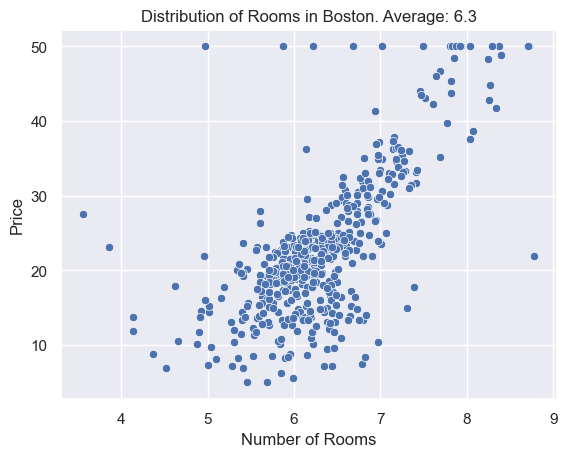

In [120]:
# Rooms and Prices
sns.scatterplot(x=df.RM, y=df.PRICE);
plt.title(f'Distribution of Rooms in Boston. Average: {df.RM.mean():.2}')
plt.xlabel('Number of Rooms')
plt.ylabel('Price');

>How the number of rooms effects home prices

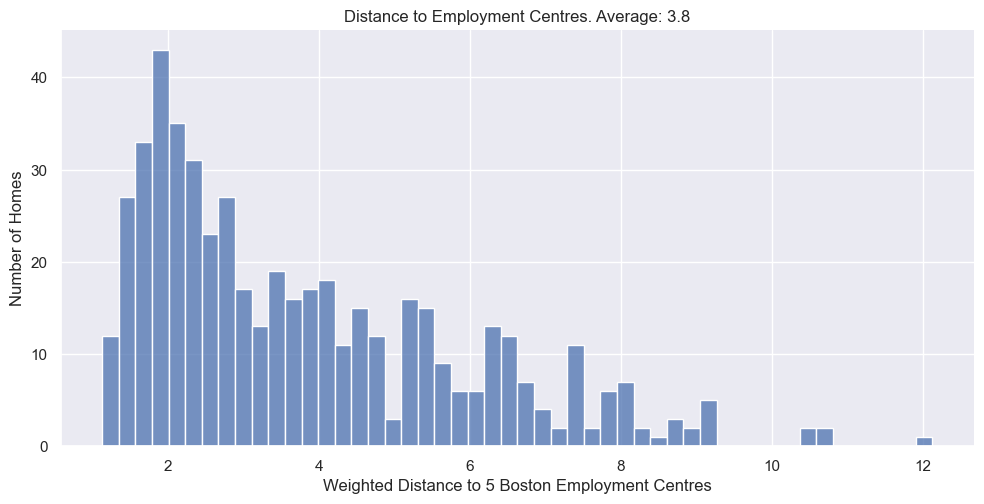

In [121]:
# Distribution of DIS
sns.displot(x=df.DIS,bins=50, aspect=2);
plt.title(f'Distance to Employment Centres. Average: {(df.DIS.mean()):.2}')
plt.xlabel('Weighted Distance to 5 Boston Employment Centres')
plt.ylabel('Number of Homes');

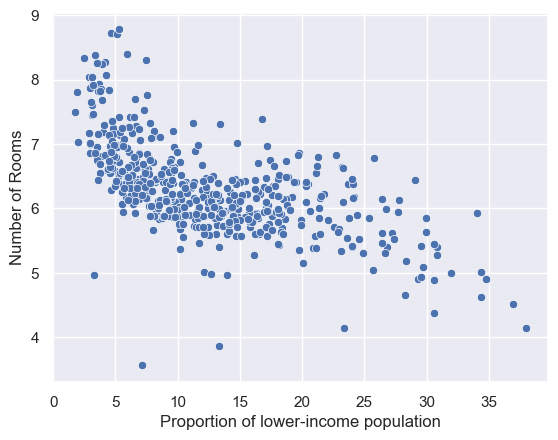

In [122]:
# Room numbers vs LSTAT
sns.scatterplot(x=df.LSTAT, y=df.RM);
plt.ylabel('Number of Rooms')
plt.xlabel('Proportion of lower-income population');

> Smaller the proportion of the lower-income population, number of the rooms increases

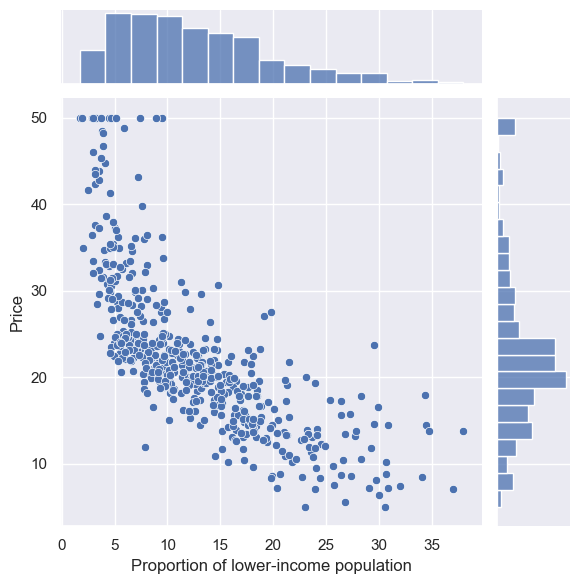

In [123]:
# Price vs LSTAT
sns.jointplot(x=df.LSTAT,y=df.PRICE); 
plt.ylabel('Price')
plt.xlabel('Proportion of lower-income population');

>The proportion of the lower-income population in an area affect home prices

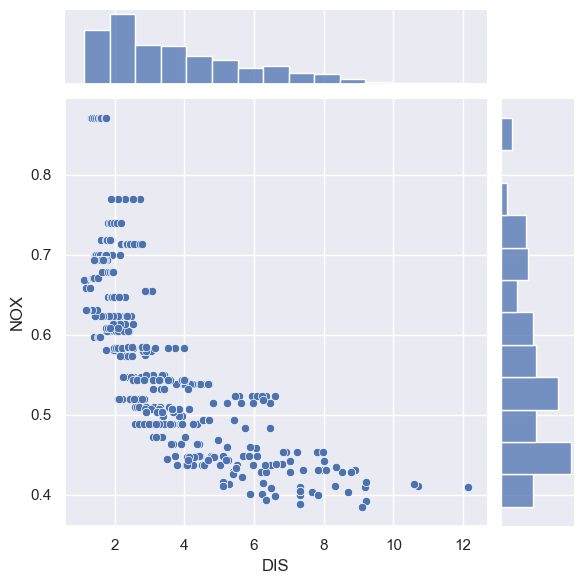

In [124]:
# NOX vs DIS
sns.jointplot(x=df['DIS'], y=df['NOX'], kind='scatter');

>NOX (Nitric Oxide Pollution) go down as the distance increases with employment centers

**Building Model for Evaluation**

In [125]:
# Firstly will try LinearRegression
np.random.seed(88) 

X = df.drop("PRICE", axis=1)
y = df.PRICE

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
linear_model = LinearRegression(n_jobs=-1)

# Fit and score the model
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)


0.7917904574689248

In [126]:
# Building Model with RandomForestRegressor
np.random.seed(90) 

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
forest_model = RandomForestRegressor(n_jobs=-1)

# Fit and score the model
forest_model.fit(X_train, y_train)
forest_model.score(X_test, y_test)


0.8895131571191105

> Looks like RandomForest gives us better results than LinearRegression about predicting house prices

In [127]:
forest_model.feature_importances_

array([0.04115033, 0.00153845, 0.00899201, 0.00091341, 0.02257269,
       0.43940424, 0.01298894, 0.03663637, 0.00429577, 0.01572019,
       0.01862235, 0.0091505 , 0.38801473])

In [128]:
def plot_features(columns, importances):
    df = (pd.DataFrame({"features": columns, "feature_importances": importances})
          .sort_values("feature_importances", ascending=False).reset_index(drop=True))
    
    fig, ax = plt.subplots()
    ax.barh(df["features"], df["feature_importances"])
    ax.set_ylabel("Features")
    ax.set_xlabel("Features Importance")
    ax.invert_yaxis()

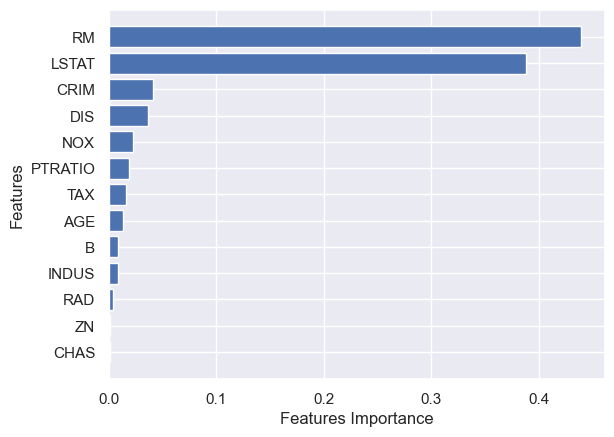

In [129]:
plot_features(X_train.columns, forest_model.feature_importances_)

* Number of rooms & The proportion of the lower-income population features effects the house prices the most